In [6]:
from qibo.models import Circuit
from qibo import gates
import numpy as np
import random, time
import qibo as qb
from IPython.display import Image

### 1) Deutsch: one qubit

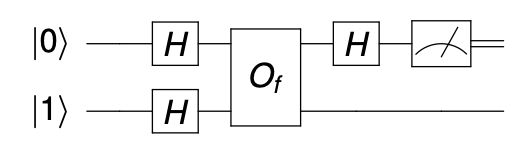

In [7]:
Image("de.png")

In [48]:
# Oracle for a boolean function that always returns 1 

oracleConst=Circuit(2)

oracleConst.add(gates.X(1).controlled_by(0))
oracleConst.add(gates.X(0))
oracleConst.add(gates.X(1).controlled_by(0))
oracleConst.add(gates.X(0))

print(oracleConst.summary())

Circuit depth = 4
Total number of gates = 4
Number of qubits = 2
Most common gates:
cx: 2
x: 2


In [49]:
# Oracle for a boolean function balanced 

oracleBalance=Circuit(2)

oracleBalance.add(gates.CNOT(0,1))

print(oracleBalance.summary())

Circuit depth = 1
Total number of gates = 1
Number of qubits = 2
Most common gates:
cx: 1


In [50]:
inState=np.array([0,1,0,0]) #(00,01,10,11)

cIn=Circuit(2)
#add H gate to 0 and 1
cIn.add(gates.H(0))
cIn.add(gates.H(1))

cOut=Circuit(2)
#add H and M to 0 
cOut.add(gates.H(0))
cOut.add(gates.M(0))


In [51]:
# f constant
c=cIn+oracleConst+cOut
Res=c.execute(initial_state=inState)
print(Res) #we always obtain 0 on the first qubit -> f constant

tf.Tensor([-0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j], shape=(4,), dtype=complex128)


In [52]:
# f balanced
c=cIn+oracleBalance+cOut
Res=c.execute(initial_state=inState)
print(Res) #we always obtain 0 on the first qubit -> f constant

tf.Tensor([ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j], shape=(4,), dtype=complex128)


Quindi misuro sempre 0 sul primo qubit se la funzione è costante, misuro sempre 1 se la funzione non è costante

### 2) Deutsch-Jozsa: 4 qubit input

In [58]:
# Oracle for a boolean function that always returns 1 

oracleConst=Circuit(5)

oracleConst.add(gates.X(4).controlled_by(0))
oracleConst.add(gates.X(0))
oracleConst.add(gates.X(4).controlled_by(0))
oracleConst.add(gates.X(0))

print(oracleConst.summary())

Circuit depth = 4
Total number of gates = 4
Number of qubits = 5
Most common gates:
cx: 2
x: 2


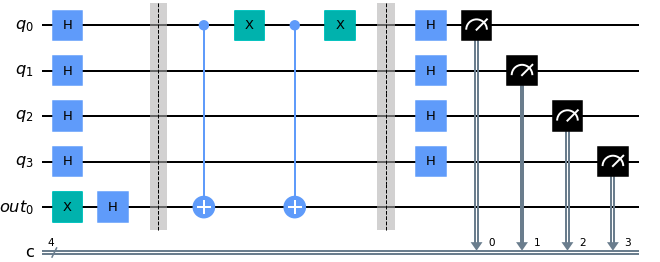

In [84]:
Image("const.png")

In [65]:
# Oracle for a boolean function balanced 

oracleBalance=Circuit(5)

oracleBalance.add(gates.X(4).controlled_by(0))

print(oracleBalance.summary())

Circuit depth = 1
Total number of gates = 1
Number of qubits = 5
Most common gates:
cx: 1


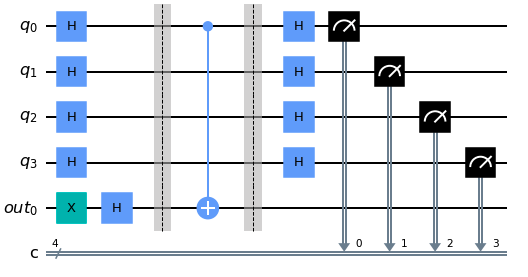

In [85]:
Image("balanced.png")

In [82]:
cIn=Circuit(5)

#rotate of pi qubit 4
cIn.add(gates.X(4)) #0->1

#add H gate to all the qubits
cIn.add([gates.H(0),gates.H(1),gates.H(2),gates.H(3),gates.H(4)])

cOut=Circuit(5)
#add H and M to input qubits
cOut.add([gates.H(0),gates.H(1),gates.H(2),gates.H(3)])
cOut.add(gates.M(0,1,2,3, register_name='Input_qubit'))

In [81]:
# f constant
c=cIn+oracleConst+cOut
Res=c(nshots=100)
print(Res.frequencies(registers=True)) #torna perchè misuro s

{'Input_qubit': Counter({'0000': 100})}


In [83]:
# f constant
c=cIn+oracleBalance+cOut
Res=c(nshots=100)
print(Res.frequencies(registers=True)) #torna perchè ottengo sempre una stringa che non è interamente fatta di 0 sui primi 4 qubit

{'Input_qubit': Counter({'1000': 100})}
